In [20]:
# Import necessary libraries                                                            #Step 1: Load & Explore Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
df = pd.read_csv(r'C:\Users\admin\Downloads\customer_churn_dataset.csv')

In [23]:
# Display first few rows
print(df.head())

  CustomerID  Age  Gender  Tenure Subscription_Type  Monthly_Charges  \
0      CUST1   56    Male      40          Standard            80.33   
1      CUST2   69    Male      45          Standard           145.25   
2      CUST3   46    Male      62             Basic            87.47   
3      CUST4   32  Female      58             Basic           108.08   
4      CUST5   60    Male      67          Standard            60.54   

   Total_Charges   Contract_Type Payment_Method  Customer_Service_Calls Churn  
0        2420.81        One Year    Credit Card                       3    No  
1        3516.33        One Year     Debit Card                       7    No  
2         398.03        One Year  Bank Transfer                       8   Yes  
3        9618.77        Two Year  Bank Transfer                       2    No  
4        6711.89  Month-to-Month    Credit Card                       4    No  


In [24]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1000 non-null   object 
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   Tenure                  1000 non-null   int64  
 4   Subscription_Type       1000 non-null   object 
 5   Monthly_Charges         1000 non-null   float64
 6   Total_Charges           1000 non-null   float64
 7   Contract_Type           1000 non-null   object 
 8   Payment_Method          1000 non-null   object 
 9   Customer_Service_Calls  1000 non-null   int64  
 10  Churn                   1000 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB
None
CustomerID                0
Age                       0
Gender                    0
Tenure                    0
Subscription_Type        

In [25]:
# Summary statistics
print(df.describe())

              Age       Tenure  Monthly_Charges  Total_Charges  \
count  1000.00000  1000.000000      1000.000000    1000.000000   
mean     43.81900    34.627000        84.734770    5004.289270   
std      14.99103    20.334782        37.562256    2829.971487   
min      18.00000     1.000000        20.000000     100.300000   
25%      31.00000    17.000000        51.835000    2595.062500   
50%      44.00000    33.500000        85.125000    5050.085000   
75%      56.00000    52.000000       117.605000    7359.550000   
max      69.00000    71.000000       149.940000    9977.720000   

       Customer_Service_Calls  
count             1000.000000  
mean                 4.546000  
std                  2.882046  
min                  0.000000  
25%                  2.000000  
50%                  5.000000  
75%                  7.000000  
max                  9.000000  


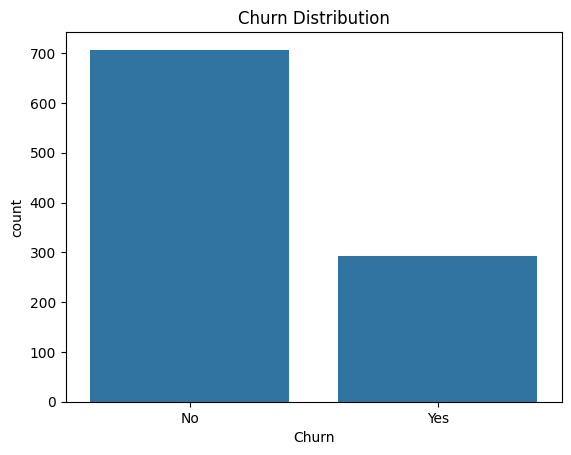

In [28]:
# Check class balance (Churn vs. No Churn)
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler                                #Step 2: Data Cleaning & Feature Engineering

In [31]:
# Convert categorical columns into numerical using Label Encoding
categorical_cols = ["Gender", "Contract_Type", "Payment_Method", "Subscription_Type"]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [32]:
# Convert target variable (Churn) to binary (0 for No, 1 for Yes)
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [34]:
# Handle missing values (fill numerical columns with median)
df.fillna(df.median(numeric_only=True), inplace=True)

In [36]:
# Scale numerical columns for better model performance
scaler = StandardScaler()
num_cols = ["Tenure", "Monthly_Charges", "Total_Charges"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [37]:
# Feature Engineering: Create new features
df["Avg_Monthly_Spend"] = df["Total_Charges"] / (df["Tenure"] + 1)  # Avoid division by zero
df["High_Support_Calls"] = df["Customer_Service_Calls"].apply(lambda x: 1 if x > 5 else 0)

In [38]:
# Save cleaned dataset
df.to_csv("customer_churn_cleaned.csv", index=False)

In [39]:
# Display cleaned data
print(df.head())

  CustomerID  Age  Gender    Tenure  Subscription_Type  Monthly_Charges  \
0      CUST1   56       1  0.264359                  2        -0.117325   
1      CUST2   69       1  0.510366                  2         1.611871   
2      CUST3   46       1  1.346791                  0         0.072855   
3      CUST4   32       0  1.149985                  0         0.621819   
4      CUST5   60       1  1.592798                  2        -0.644447   

   Total_Charges  Contract_Type  Payment_Method  Customer_Service_Calls  \
0      -0.913356              1               1                       3   
1      -0.526049              1               2                       7   
2      -1.628484              1               0                       8   
3       1.631391              2               0                       2   
4       0.603700              0               1                       4   

   Churn  Avg_Monthly_Spend  High_Support_Calls  
0      0          -0.722387                   0 

In [40]:
from sklearn.model_selection import train_test_split                                                  #Step 3: Train & Evaluate Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
# Split data into features (X) and target variable (y)
X = df.drop(columns=["CustomerID", "Churn"])  # Drop ID & target
y = df["Churn"]  # Target variable

In [42]:
# Split dataset into training (80%) & testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [46]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your model, e.g., a classifier
y_pred = model.predict(X_test)  # Predict using your model on the test set

# Now you can evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.72


In [47]:
# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84       144
           1       1.00      0.02      0.04        56

    accuracy                           0.72       200
   macro avg       0.86      0.51      0.44       200
weighted avg       0.80      0.72      0.61       200



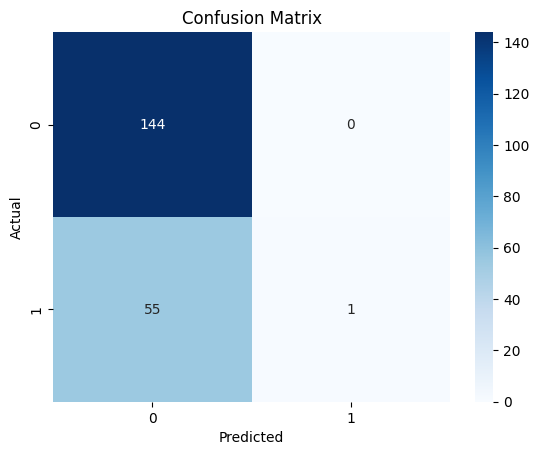

In [48]:
# Display confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [49]:
import joblib

# Save the trained model
joblib.dump(model, "customer_churn_model.pkl")

print("Model saved successfully!")

Model saved successfully!
